<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [69]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read CSV
house_csv = "../../DATA/Sacramento_transactions.csv"

In [3]:
data = pd.read_csv(house_csv)

In [4]:
data.head()

street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879  
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028  
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839  
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146  
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768

In [5]:
data.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [6]:
data['zip'] = data['zip'].astype(str)

In [7]:
data.dtypes

street        object
city          object
zip           object
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [51]:
#Remove noise 0 from baths and beds
df = data[data.beds != 0]
df.shape

(877, 13)

In [54]:
#Remove noise 0 from sq__ft
df = data[data.sq__ft != 0]
df.shape

(814, 13)

In [62]:
df

street             city    zip state  beds  baths  sq__ft  \
0           3526 HIGH ST       SACRAMENTO  95838    CA     2      1     836   
1            51 OMAHA CT       SACRAMENTO  95823    CA     3      1    1167   
2         2796 BRANCH ST       SACRAMENTO  95815    CA     2      1     796   
3       2805 JANETTE WAY       SACRAMENTO  95815    CA     2      1     852   
4        6001 MCMAHON DR       SACRAMENTO  95824    CA     2      1     797   
..                   ...              ...    ...   ...   ...    ...     ...   
980   9169 GARLINGTON CT       SACRAMENTO  95829    CA     4      3    2280   
981      6932 RUSKUT WAY       SACRAMENTO  95823    CA     3      2    1477   
982    7933 DAFFODIL WAY   CITRUS HEIGHTS  95610    CA     3      2    1216   
983     8304 RED FOX WAY        ELK GROVE  95758    CA     4      2    1685   
984  3882 YELLOWSTONE LN  EL DORADO HILLS  95762    CA     3      2    1362   

            type                     sale_date   price   latitude   longitude  \
0    Residential  Wed May 21 00:00:00 EDT 2008   59222  38.631913 -121.434879   
1    Residential  Wed May 21 00:00:00 EDT 2008   68212  38.478902 -121.431028   
2    Residential  Wed May 21 00:00:00 EDT 2008   68880  38.618305 -121.443839   
3    Residential  Wed May 21 00:00:00 EDT 2008   69307  38.616835 -121.439146   
4    Residential  Wed May 21 00:00:00 EDT 2008   81900  38.519470 -121.435768   
..           ...                           ...     ...        ...         ...   
980  Residential  Thu May 15 00:00:00 EDT 2008  232425  38.457679 -121.359620   
981  Residential  Thu May 15 00:00:00 EDT 2008  234000  38.499893 -121.458890   
982  Residential  Thu May 15 00:00:00 EDT 2008  235000  38.708824 -121.256803   
983  Residential  Thu May 15 00:00:00 EDT 2008  235301  38.417000 -121.397424   
984  Residential  Thu May 15 00:00:00 EDT 2008  235738  38.655245 -121.075915   

        prediction  
0    208206.784187  
1    226133.293924  
2    206040.438599  
3    209073.322422  
4    206094.597239  
..             ...  
980  286411.859897  
981  242922.472227  
982  228787.067268  
983  254187.469282  
984  236694.228663  

[814 rows x 13 columns]

/Users/Vagner/opt/anaconda3/envs/test/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='beds', ylabel='price'>

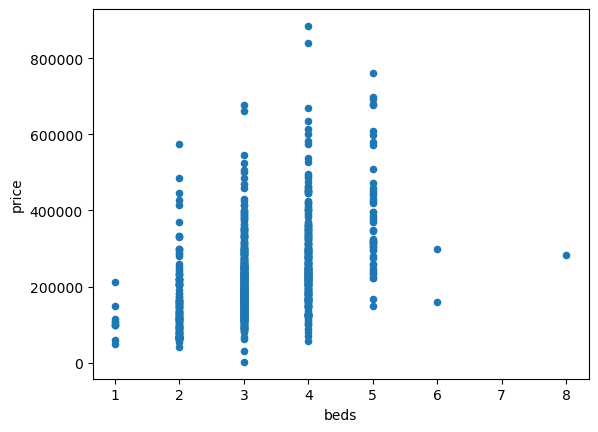

In [68]:
df.plot.scatter('beds', 'price')

<AxesSubplot: xlabel='beds', ylabel='price'>

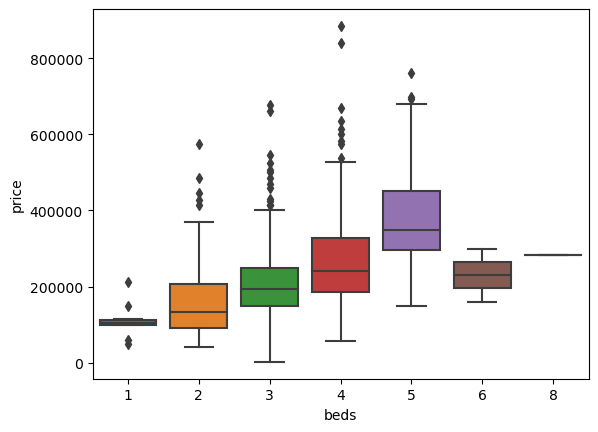

In [73]:
sns.boxplot(x='beds', y='price' , data=df)

In [74]:
df[df.beds == 4].query("price > 800000")

street    city    zip state  beds  baths  sq__ft  \
334      3935 EL MONTE DR  LOOMIS  95650    CA     4      4    1624   
864  9401 BARREL RACER CT  WILTON  95693    CA     4      3    4400   

            type                     sale_date   price   latitude   longitude  \
334  Residential  Tue May 20 00:00:00 EDT 2008  839000  38.813337 -121.133348   
864  Residential  Fri May 16 00:00:00 EDT 2008  884790  38.415298 -121.194858   

        prediction  
334  250883.792261  
864  401228.176037

In [78]:
df.groupby(['city']).price.mean().sort_values(ascending=False)

city
GRANITE BAY        678733.333333
WILTON             631885.500000
LOOMIS             567000.000000
PENRYN             506688.000000
FOLSOM             415288.200000
PLACERVILLE        404709.600000
CAMERON PARK       399000.000000
RANCHO MURIETA     397750.000000
GREENWOOD          395000.000000
WALNUT GROVE       380000.000000
GOLD RIVER         377333.333333
ROCKLIN            336244.875000
AUBURN             321818.000000
FAIR OAKS          303500.666667
COOL               300000.000000
EL DORADO HILLS    299412.666667
CARMICHAEL         295684.750000
ROSEVILLE          294058.071429
ORANGEVALE         279159.545455
ELK GROVE          270238.102804
LINCOLN            262921.166667
EL DORADO          247000.000000
POLLOCK PINES      240302.666667
MATHER             237800.000000
RANCHO CORDOVA     235065.047619
ANTELOPE           232496.393939
GALT               231040.600000
MEADOW VISTA       230000.000000
DIAMOND SPRINGS    216033.000000
SACRAMENTO         194560.952830
CITRU

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [ ]:
# ANSWER
#Price

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [ ]:
# ANSWER
#beds, baths, sq__ft, type

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [8]:
data.corr()

beds     baths    sq__ft     price  latitude  longitude
beds       1.000000  0.839650  0.684041  0.342024 -0.291307  -0.053993
baths      0.839650  1.000000  0.665690  0.416208 -0.235792   0.016582
sq__ft     0.684041  0.665690  1.000000  0.333897 -0.383274  -0.177742
price      0.342024  0.416208  0.333897  1.000000 -0.039573   0.284485
latitude  -0.291307 -0.235792 -0.383274 -0.039573  1.000000   0.387925
longitude -0.053993  0.016582 -0.177742  0.284485  0.387925   1.000000

In [79]:
df.corr()

beds     baths    sq__ft     price  latitude  longitude  \
beds        1.000000  0.654746  0.695710  0.441988 -0.107440   0.056713   
baths       0.654746  1.000000  0.724631  0.501820 -0.081249   0.108081   
sq__ft      0.695710  0.724631  1.000000  0.693708 -0.103287   0.135809   
price       0.441988  0.501820  0.693708  1.000000  0.058475   0.278312   
latitude   -0.107440 -0.081249 -0.103287  0.058475  1.000000   0.344431   
longitude   0.056713  0.108081  0.135809  0.278312  0.344431   1.000000   
prediction  0.695710  0.724631  1.000000  0.693708 -0.103287   0.135809   

            prediction  
beds          0.695710  
baths         0.724631  
sq__ft        1.000000  
price         0.693708  
latitude     -0.103287  
longitude     0.135809  
prediction    1.000000

In [ ]:
# ANSWER
#baths, beds, sq__ft

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [9]:
from sklearn.linear_model import LinearRegression

/Users/Vagner/opt/anaconda3/envs/test/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# linreg.fit() training the model
# linreg.score() finding R2
# linreg.predict() prediction

##### 2.4.1 Fit predictor and target variables using linear regression 

In [17]:
# ANSWER

#X = data['sq__ft'].values.reshape(-1,1)
X = data[['sq__ft']]
Y = data['price']

#instantiate the model
linreg = LinearRegression()

linreg.fit(X, Y)

print(linreg.coef_, linreg.intercept_)

[54.15863969] 162930.16140699774


In [80]:
X = df[['sq__ft']]
Y = df['price']

#instantiate the model
linreg = LinearRegression()

linreg.fit(X, Y)

print(linreg.coef_, linreg.intercept_)

[125.21648668] 30210.633866918943


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [81]:
# ANSWER
linreg.score(X, Y)

0.4812307133326901

In [21]:
data['prediction'] = linreg.predict(X)

In [22]:
data.head()

street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  \
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879   
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028   
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839   
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146   
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768   

      prediction  
0  208206.784187  
1  226133.293924  
2  206040.438599  
3  209073.322422  
4  206094.597239

### 3. Splitting Data

In [12]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [82]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [83]:
# ANSWER
## Check training/test data
X.shape

(814, 1)

In [84]:
X_train.shape

(651, 1)

In [85]:
y_train.shape

(651,)

In [86]:
X_test.shape

(163, 1)

In [87]:
y_test.shape

(163,)

#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [88]:
# ANSWER
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_, linreg.intercept_)

[125.72409443] 29920.12755309639


In [ ]:
# ANSWER

In [89]:
linreg.score(X_test, y_test)

0.43600638682400816

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [43]:
pred = [[1204]]
pred

[[1204]]

In [44]:
# ANSWER
linreg.predict(pred)

/Users/Vagner/opt/anaconda3/envs/test/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([227730.50204809])

#### Find the error

In [45]:
# Predict price from X_test
linreg.predict(X_test)

array([213343.85924209, 284601.19072416, 264324.71428618, 253558.8708441 ,
       243324.0779754 , 169604.60292586, 169604.60292586, 261331.52014533,
       169604.60292586, 169604.60292586, 221840.66841611, 169604.60292586,
       224640.75325754, 169604.60292586, 223095.87886227, 246172.44014169,
       207985.07618348, 208033.35350834, 169604.60292586, 314871.07340659,
       257952.10740567, 235358.31937477, 282283.87913125, 230675.41886409,
       226282.18230252, 248006.97848608, 263262.61313942, 222709.66026345,
       246655.21339022, 258338.32600448, 230868.5281635 , 258965.93122756,
       242261.97682865, 243082.69135114, 169604.60292586, 226282.18230252,
       209964.44650243, 246896.60001448, 219764.74344746, 169604.60292586,
       267607.57237614, 199053.7710858 , 169604.60292586, 280980.39136024,
       258965.93122756, 248200.08778549, 237675.63096768, 292711.78129936,
       231592.68803628, 374590.12424894, 239944.66523574, 229854.7043416 ,
       244096.51517304, 2



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



